In [25]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import glob, os

# 문서 유사도

문서 유사도 측정 방법 - 코사인 유사도

벡터와 벡터 간의 유사도를 비교

In [4]:
# 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수 생성

def cos_cimilarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * (sum(np.square(v2))))
    similarity = dot_product/ l2_norm
    
    return similarity

## 문장 벡터화(희소행렬 형태)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)
feature_vect_simple

(3, 18)


<3x18 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Row format>

## 희소행렬 형태를 배열 형태로 변환

In [10]:
# 밀집 행렬로 변환 (희소행렬은 3차원 형태)

feature_vect_dense = feature_vect_simple.todense()
feature_vect_dense

matrix([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
         0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
         0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
         0.49087711, 0.        , 0.24543856],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
         0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
         0.23402865, 0.39624495, 0.4680573 ],
        [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
         0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
         0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
         0.3660119 , 0.        , 0.3660119 ]])

#### 각각을 배열로 반환

In [16]:
# 각 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )

vect1

array([0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
       0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
       0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
       0.49087711, 0.        , 0.24543856])

In [12]:
vect2

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
       0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
       0.23402865, 0.39624495, 0.4680573 ])

### 1번째 문장과 2번째 문장의 유사도

In [18]:
# vect1과 vect2의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple_1 = cos_cimilarity(vect1, vect2)
similarity_simple_1

0.40207758214950134

### 1번째 문장과 3번째 문장의 유사도

In [20]:
similarity_simple_2 = cos_cimilarity(vect1, vect3)
similarity_simple_2

0.4042504477594862

### 2번째 문장과 3번째 문장의 유사도

In [21]:
similarity_simple_3 = cos_cimilarity(vect2, vect3)
similarity_simple_3

0.45647296026166395

## 3문장의 전체 유사도 확인

In [ ]:
# 사이킷런의 함수 사용

In [23]:
from sklearn.metrics.pairwise import cosine_similarity # 파라미터(비교 기준이 되는 문서의 피처 행렬, 비교되는 문서의 피처 행렬)

# 희소행렬 형태로 입력 가능
print(cosine_similarity(feature_vect_simple[0], feature_vect_simple))
cosine_similarity(feature_vect_simple, feature_vect_simple)

[[1.         0.40207758 0.40425045]]


array([[1.        , 0.40207758, 0.40425045],
       [0.40207758, 1.        , 0.45647296],
       [0.40425045, 0.45647296, 1.        ]])

# [실습] : Opinion Review 데이터 세트를 이용한 문서 유사도 측정

## 1. 파일 불러오기

In [28]:
# 불러올 데이터 위치 폴더 경로

path = r'C:/cakd7/git/class/study/m8_머신러닝 응용/OpinosisDataset1.0/topics'

# 파일이름이 .data로 끝나는 것 전부 
all_files = glob.glob(os.path.join(path, "*.data"))

# 파일명 담을 리스트
filename_list = []
# 파일 안에 내용 담을 리스트
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
    
    # 경로\\의 마지막 부분인 파일 이름만 추출
    filename_ = file_.split('\\')[-1] 
    filename_ = filename_.split('.')[0] # .data 제거
    filename_list.append(filename_) # 파일 이름 추가
    
    opinion_text.append(df.to_string()) # 해당 파일안에 내용을 문자 형태로 담음
    
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text': opinion_text})

document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,...
1,bathroom_bestwestern_hotel_sfo,...
2,battery-life_amazon_kindle,...
3,battery-life_ipod_nano_8gb,...
4,battery-life_netbook_1005ha,...


## 2. 문자 벡터화

In [29]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 제거할 부분 문장부호 딕셔너리로 저장
# ord : 하나의 문자를 인자로 받고 해당 문자에 해당하는 유니코드 정수화
# string.punctuation : 따옴표, 마침표 물음표 등의 문장 부호
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation) # 문장부호에있는 부호의 유니코드 정수화 값을 None값으로 저장
print(remove_punct_dict)

# 표제어 추출: 어간 추출과 달리 단어의 형태가 적절히 보존되는 양상을 보이는 특징
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환. 
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 입력으로 문장을 받아서 stop words 제거-> lower : 소문자 변환 -> nltk.word_tokenize : 단어 토큰화 -> lemmatization 어근 변환. 
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict))) # 문장부호 제거

{33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english', ngram_range = (1, 2), min_df = 0.05, max_df = 0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

# 객체 생성
feature_vect

<51x4611 sparse matrix of type '<class 'numpy.float64'>'
	with 30124 stored elements in Compressed Sparse Row format>

## 3. 문서 군집화

In [33]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)

# 군집 라벨
cluster_label = km_cluster.labels_
# 군집 중심 지수
cluster_centers = km_cluster.cluster_centers_

# 군집 라벨 컬럼 추가
document_df['cluster_label'] = cluster_label

In [34]:
for i in range(3):
    print(f'군집 {i}')
    display(document_df[document_df['cluster_label']==i])

군집 0


,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
2,battery-life_amazon_kindle,...,0
3,battery-life_ipod_nano_8gb,...,0
4,battery-life_netbook_1005ha,...,0
5,buttons_amazon_kindle,...,0
8,directions_garmin_nuvi_255W_gps,...,0
9,display_garmin_nuvi_255W_gps,...,0
10,eyesight-issues_amazon_kindle,...,0
11,features_windows7,...,0
12,fonts_amazon_kindle,...,0


군집 1


,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,...,1
13,food_holiday_inn_london,...,1
14,food_swissotel_chicago,...,1
15,free_bestwestern_hotel_sfo,...,1
20,location_bestwestern_hotel_sfo,...,1
21,location_holiday_inn_london,...,1
24,parking_bestwestern_hotel_sfo,...,1
28,price_holiday_inn_london,...,1
30,rooms_bestwestern_hotel_sfo,...,1
31,rooms_swissotel_chicago,...,1


군집 2


,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,...,2
7,comfort_toyota_camry_2007,...,2
16,gas_mileage_toyota_camry_2007,...,2
17,interior_honda_accord_2008,...,2
18,interior_toyota_camry_2007,...,2
22,mileage_honda_accord_2008,...,2
25,performance_honda_accord_2008,...,2
29,quality_toyota_camry_2007,...,2
37,seats_honda_accord_2008,...,2
47,transmission_toyota_camry_2007,...,2


## 4. 호텔로 군집화된 문서의 인덱스 추출
- 1번 군집이 호텔로 구성

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

hotel_indexes = document_df[document_df['cluster_label']==1].index

print('호텔로 클러스터링 된 문서들의 DF 인덱스: ', hotel_indexes)

# 호텔로 군집된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 다른 문서 유사도 #####')

# 호텔 군집화된 인덱스를 피처 벡터화 후 첫 번째 문서와 다른 문서 간 코사인 유사도 측정

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
similarity_pair

호텔로 클러스터링 된 문서들의 DF 인덱스:  Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
##### 비교 기준 문서명 bathroom_bestwestern_hotel_sfo 와 다른 문서 유사도 #####


array([[1.        , 0.0430688 , 0.05221059, 0.06189595, 0.05846178,
        0.06193118, 0.03638665, 0.11742762, 0.38038865, 0.32619948,
        0.51442299, 0.11282857, 0.13989623, 0.1386783 , 0.09518068,
        0.07049362]])

In [41]:
similarity_pair[:, 1:]

array([[0.0430688 , 0.05221059, 0.06189595, 0.05846178, 0.06193118,
        0.03638665, 0.11742762, 0.38038865, 0.32619948, 0.51442299,
        0.11282857, 0.13989623, 0.1386783 , 0.09518068, 0.07049362]])

## 5. 유사도 높은 순으로 정렬 후 시각화

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

### 1) 첫번째 문서와 다른 문서간 유사도가 큰 순으로 정렬 (자기 자신인 1인 제외)

In [43]:
# 첫번째 문서와 다른 문서간 유사도가 큰 순으로 정렬 (자기 자신인 1인 제외)

sorted_index = similarity_pair[:, 1:].argsort()[:, ::-1]
sorted_index

array([[ 9,  7,  8, 11, 12,  6, 10, 13, 14,  4,  2,  3,  1,  0,  5]],
      dtype=int64)

In [47]:
hotel_indexes

Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')

In [46]:
hotel_indexes[sorted_index.reshape(-1)]

Int64Index([31, 28, 30, 38, 39, 24, 32, 40, 45, 20, 14, 15, 13, 1, 21], dtype='int64')

In [50]:
# 유사도가 큰순으로 hotel_인덱스를 추출 후 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)] # 1차원 배열로 변경

# 유사도가 큰순으로 유사도 값을 재정렬 (자기 자신 제외)
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]
hotel_1_sim_value

array([0.51442299, 0.38038865, 0.32619948, 0.13989623, 0.1386783 ,
       0.11742762, 0.11282857, 0.09518068, 0.07049362, 0.06193118,
       0.06189595, 0.05846178, 0.05221059, 0.0430688 , 0.03638665])

### 2) 유사도가 큰 순으로 정렬된 파일명과 유사도 값을 시각화

가장 유사도가 큰 파일명 및 유사도
filename      rooms_swissotel_chicago
similarity                   0.514423
Name: 31, dtype: object


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

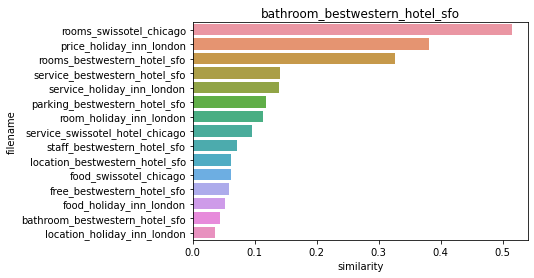

In [54]:
# 유사도가 큰 순으로 정렬된 파일명과 유사도 값을 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도')
print(hotel_1_sim_df.iloc[0, :])

sns.barplot(x = 'similarity', y = 'filename', data = hotel_1_sim_df)
plt.title(comparison_docname)

# 2. 한글 텍스트 처리

# [실습] : 네이버 영화 평점 감성 분석

## 1. 데이터 불러오기
- ratings, ratings_train, ratings_test

#### 훈련용 데이터

In [80]:
train_df = pd.read_csv('ratings_train.txt', sep = '\t', encoding = 'UTF8')
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


#### 테스트용 데이터

In [59]:
test_df = pd.read_csv('ratings_test.txt', sep = '\t', encoding = 'UTF8')
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [60]:
ratings = pd.read_csv('ratings.txt', sep = '\t', encoding = 'UTF8')
ratings.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


## 2. 데이터 확인

In [61]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [62]:
test_df['label'].value_counts()

1    25173
0    24827
Name: label, dtype: int64

In [63]:
ratings['label'].value_counts()

1    100000
0    100000
Name: label, dtype: int64

-> 긍정이 1, 부정이 0 의 데이터가 각 100000개씩 있는 데이터

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [66]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [67]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


-> null 값 존재

In [76]:
train_df[train_df['document'].isnull() == True]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [77]:
test_df[test_df['document'].isnull() == True]

,id,document,label
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


In [78]:
ratings[ratings['document'].isnull() == True]

,id,document,label
46471,6369843,NaN,1
60735,511097,NaN,1
77665,2172111,NaN,1
84098,402110,NaN,1
127017,5942978,NaN,0
172375,5026896,NaN,0
173526,1034280,NaN,0
197279,1034283,NaN,0


## 3. 데이터 처리

#### null 값 제거

In [81]:
# 공백으로 변환

import re

train_df = train_df.fillna(' ')
test_df = test_df.fillna(' ')

#### 정규 표현식으로 숫자를 공백으로 변경 (단어적인 의미가 부족해서)

In [82]:
import re

train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'\d+', " ", x))
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'\d+', " ", x))

#### id 컬럼 삭제 

In [83]:
train_df_ = train_df.drop('id', axis=1, inplace = False)
test_df_ = test_df.drop('id', axis=1, inplace = False)

## 4. 텍스트 벡터화

### 1) 한글 형태소 분석(형태소 단어로 토큰화)

In [86]:
from konlpy.tag import Okt

okt = Okt()

# 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
def okt_tokenizer(text):
    tokens_ko = okt.morphs(text)
    return tokens_ko

In [87]:
okt.morphs('가나')

['가나']

### 2) TF-IDF 피처 벡터화

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 객체 생성(토큰화 방법 위에서 만든 함수 적용(okt))
tfidf_vect = TfidfVectorizer(tokenizer=okt_tokenizer, ngram_range = (1, 2), min_df = 3, max_df = 0.9)
# 객체에 데이터 대입
tfidf_vect.fit(train_df_['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df_['document'])

## 5. 로지스틱 회귀로 감성 분석 분류 수행

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lg_clf = LogisticRegression(random_state = 0, solver = 'liblinear')

# best 파라미터 찾기

params = { 'C': [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
grid_cv.fit(tfidf_matrix_train, train_df_['label'])
print(grid_cv.best_params_, grid_cv.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   24.9s finished


{'C': 3.5} 0.8592733333333333


### 최적의 파라미터 값으로 검증

In [94]:
from sklearn.metrics import accuracy_score

# 테스트 테이터를 피처 벡터화 해줌 (위에서 학습용으로 맞춘 객체 활용)
tfidf_matrix_test = tfidf_vect.transform(test_df_['document'])

# 최적의 파라미터 적용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('로지스틱 회귀 정확도')
accuracy_score(test_df_['label'], preds)

로지스틱 회귀 정확도


0.86172